Logistic Regression

The data

我们将建立一个逻辑回归模型来预测一个学生是否被大学录取。假设你是一个大学系的管理员，你想根据两次考试的结果来决定每个申请人的录取机会。你有以前的申请人的历史数据，你可以用它作为逻辑回归的训练集。对于每一个培训例子，你有两个考试的申请人的分数和录取决定。为了做到这一点，我们将建立一个分类模型，根据考试成绩估计入学概率。


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pdData=pd.read_csv('LogiReg_data.txt',header=None,names=['Exam 1','Exam 2','Admitted']) # names是自己指定列名
pdData.head()
# Exam 1,2是特征，admitted是判断这个人是否被录取了

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
pdData.shape

(100, 3)

### 将原始的数据利用散点图绘制出来先观察数据的特征

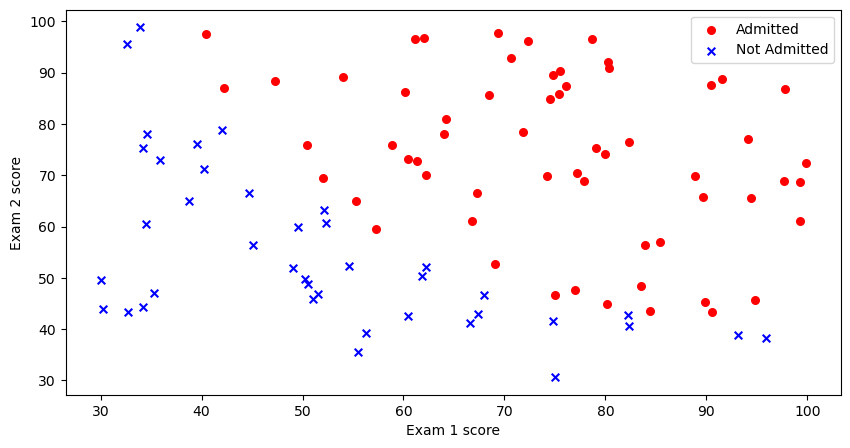

In [4]:
positive=pdData[pdData['Admitted']==1]  # 将最终结果为1的存入positive变量
negative=pdData[pdData['Admitted']==0] #将最终结果为0的存入negative变量

fig,ax=plt.subplots(figsize=(10,5)) # 制定绘制图像的画布大小
ax.scatter(positive['Exam 1'],positive['Exam 2'],s=30,color='r',marker='o',label='Admitted')
ax.scatter(negative['Exam 1'],negative['Exam 2'],s=30,color='b',marker='x',label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 score')
ax.set_ylabel('Exam 2 score')
plt.show()

### 观察上图其实可以发现该图两个类别可以通过一个决策边界进行区分

## The logistic regression

目标：建立分类器（求解出三个参数 $\theta_0         \theta_1         \theta_2 $）


设定阈值，根据阈值判断录取结果

### 要完成的模块
-  `sigmoid` : 映射到概率的函数

-  `model` : 返回预测结果值

-  `cost` : 根据参数计算损失

-  `gradient` : 计算每个参数的梯度方向

-  `descent` : 进行参数更新

-  `accuracy`: 计算精度

###  `sigmoid` 函数

$$
g(z) = \frac{1}{1+e^{-z}}   
$$

In [5]:
# 定义sigmoid函数

def sigmoid(z):
    return 1/(1+np.exp(-z))

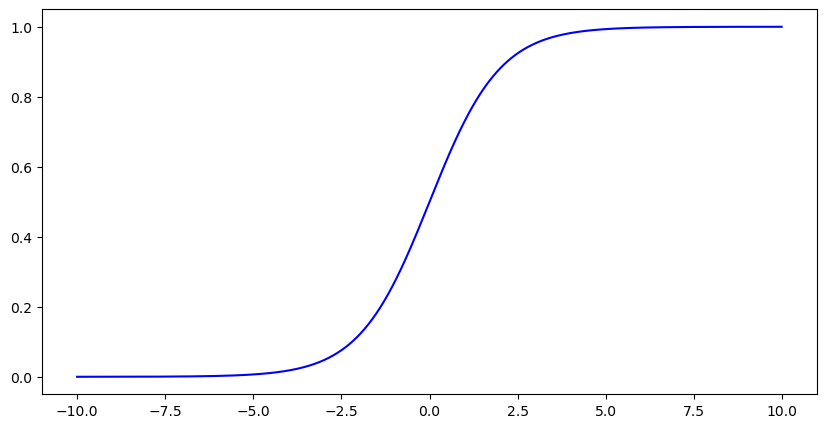

In [6]:
#绘制一下sigmoid函数的图像
Xnums=np.arange(-10,10,0.01) # 创建x轴的坐标
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(Xnums,sigmoid(Xnums),'b')

### Sigmoid
* $F:\mathbb{R} \to [0,1]$
* $F(0)=0.5$
* $F(- \infty)=0$
* $F(+ \infty)=1$

#### 首先计算y=wx+b 再将y的值作为自变量传入Sigmoid函数之中

$$
\begin{array}{ccc}
\begin{pmatrix}\theta_{0} & \theta_{1} & \theta_{2}\end{pmatrix} & \times & \begin{pmatrix}1\\
x_{1}\\
x_{2}
\end{pmatrix}\end{array}=\theta_{0}+\theta_{1}x_{1}+\theta_{2}x_{2}
$$

In [7]:
def modle(X,theta):
    return sigmoid(np.dot(X,theta.T))

In [8]:
#在原始数据中新加入一列,使该列的数据全为1
pdData.insert(0,'One',1) # 列名是one 
pdData.head()

,One,Exam 1,Exam 2,Admitted
0,1,34.623660,78.024693,0
1,1,30.286711,43.894998,0
2,1,35.847409,72.902198,0
3,1,60.182599,86.308552,1
4,1,79.032736,75.344376,1


In [9]:
## 设置训练集和目标集
orig_data = pdData.iloc[:,:].values # 将其转化为数组的形式方便计算
orig_data

array([[ 1.        , 34.62365962, 78.02469282,  0.        ],
       [ 1.        , 30.28671077, 43.89499752,  0.        ],
       [ 1.        , 35.84740877, 72.90219803,  0.        ],
       [ 1.        , 60.18259939, 86.3085521 ,  1.        ],
       [ 1.        , 79.03273605, 75.34437644,  1.        ],
       [ 1.        , 45.08327748, 56.31637178,  0.        ],
       [ 1.        , 61.10666454, 96.51142588,  1.        ],
       [ 1.        , 75.02474557, 46.55401354,  1.        ],
       [ 1.        , 76.0987867 , 87.42056972,  1.        ],
       [ 1.        , 84.43281996, 43.53339331,  1.        ],
       [ 1.        , 95.86155507, 38.22527806,  0.        ],
       [ 1.        , 75.01365839, 30.60326323,  0.        ],
       [ 1.        , 82.30705337, 76.4819633 ,  1.        ],
       [ 1.        , 69.36458876, 97.71869196,  1.        ],
       [ 1.        , 39.53833914, 76.03681085,  0.        ],
       [ 1.        , 53.97105215, 89.20735014,  1.        ],
       [ 1.        , 69.

In [10]:
cols = orig_data.shape[1] # 找到数据的列数
X = orig_data[:,0:cols-1] 
y = orig_data[:,cols-1:cols]

In [11]:
X

array([[ 1.        , 34.62365962, 78.02469282],
       [ 1.        , 30.28671077, 43.89499752],
       [ 1.        , 35.84740877, 72.90219803],
       [ 1.        , 60.18259939, 86.3085521 ],
       [ 1.        , 79.03273605, 75.34437644],
       [ 1.        , 45.08327748, 56.31637178],
       [ 1.        , 61.10666454, 96.51142588],
       [ 1.        , 75.02474557, 46.55401354],
       [ 1.        , 76.0987867 , 87.42056972],
       [ 1.        , 84.43281996, 43.53339331],
       [ 1.        , 95.86155507, 38.22527806],
       [ 1.        , 75.01365839, 30.60326323],
       [ 1.        , 82.30705337, 76.4819633 ],
       [ 1.        , 69.36458876, 97.71869196],
       [ 1.        , 39.53833914, 76.03681085],
       [ 1.        , 53.97105215, 89.20735014],
       [ 1.        , 69.07014406, 52.74046973],
       [ 1.        , 67.94685548, 46.67857411],
       [ 1.        , 70.66150955, 92.92713789],
       [ 1.        , 76.97878373, 47.57596365],
       [ 1.        , 67.37202755, 42.838

In [12]:
y 

array([[0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [13]:
theta = np.zeros([1, 3]) # 初试的时候将theta设置为0向量

In [14]:
X.shape, y.shape, theta.shape

((100, 3), (100, 1), (1, 3))

### 损失函数
将对数似然函数去负号

$$
D(h_\theta(x), y) = -y\log(h_\theta(x)) - (1-y)\log(1-h_\theta(x))
$$
求平均损失
$$
J(\theta)=\frac{1}{n}\sum_{i=1}^{n} D(h_\theta(x_i), y_i)
$$

In [15]:
modle(X,theta)

array([[0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
      

In [16]:
np.log(modle(X,theta))

array([[-0.69314718],
       [-0.69314718],
       [-0.69314718],
       [-0.69314718],
       [-0.69314718],
       [-0.69314718],
       [-0.69314718],
       [-0.69314718],
       [-0.69314718],
       [-0.69314718],
       [-0.69314718],
       [-0.69314718],
       [-0.69314718],
       [-0.69314718],
       [-0.69314718],
       [-0.69314718],
       [-0.69314718],
       [-0.69314718],
       [-0.69314718],
       [-0.69314718],
       [-0.69314718],
       [-0.69314718],
       [-0.69314718],
       [-0.69314718],
       [-0.69314718],
       [-0.69314718],
       [-0.69314718],
       [-0.69314718],
       [-0.69314718],
       [-0.69314718],
       [-0.69314718],
       [-0.69314718],
       [-0.69314718],
       [-0.69314718],
       [-0.69314718],
       [-0.69314718],
       [-0.69314718],
       [-0.69314718],
       [-0.69314718],
       [-0.69314718],
       [-0.69314718],
       [-0.69314718],
       [-0.69314718],
       [-0.69314718],
       [-0.69314718],
       [-0

In [17]:
left=np.multiply(-y , np.log(modle(X,theta)))

In [18]:
right=np.multiply(1 - y,  np.log(1-modle(X,theta)))

In [19]:
np.sum(left-right)

69.31471805599453

In [20]:
np.sum([1,2,3,4])

10

In [21]:
def cost(X,y,theta):
    left=np.multiply(-y , np.log(modle(X,theta)))
    right=np.multiply(1 - y,  np.log(1-modle(X,theta)))
    return np.sum(left-right)/(len(X))

In [22]:
cost(X,y,theta) # 计算最初的损失值

0.6931471805599453

### 计算梯度


$$
\frac{\partial J}{\partial \theta_j}=-\frac{1}{m}\sum_{i=1}^n (y_i - h_\theta (x_i))x_{ij}
$$


In [23]:
error=(modle(X,theta)-y).ravel()
error

array([ 0.5,  0.5,  0.5, -0.5, -0.5,  0.5, -0.5, -0.5, -0.5, -0.5,  0.5,
        0.5, -0.5, -0.5,  0.5, -0.5, -0.5,  0.5, -0.5, -0.5,  0.5, -0.5,
        0.5,  0.5, -0.5, -0.5, -0.5,  0.5,  0.5,  0.5, -0.5, -0.5,  0.5,
       -0.5,  0.5,  0.5,  0.5, -0.5,  0.5,  0.5, -0.5,  0.5, -0.5,  0.5,
        0.5,  0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5,  0.5,  0.5,
        0.5, -0.5,  0.5, -0.5, -0.5, -0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
       -0.5,  0.5, -0.5, -0.5,  0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5,
       -0.5,  0.5,  0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5,  0.5, -0.5,
       -0.5,  0.5, -0.5, -0.5,  0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5,
       -0.5])

In [24]:
def graident(X,y,theta):
    grad=np.zeros(theta.shape)
    error=(modle(X,theta)-y).ravel() #ravel() 是一个用于将多维数组降为一维数组的函数
    for j in range(len(theta.ravel())):
        term=np.multiply(error,X[:,j])
        grad[0:j]=np.sum(term)/len(X)
    return grad

比较3中不同梯度下降方法

In [25]:
stop_iter=0
stop_cost=1
stop_grad=2

def stopCriterion(type,value,thresold):
    ## 设定三种不同的停止策略
    if type==stop_iter:
        return value>thresold
    elif type==stop_cost:
        return abs(value[-1]-value[-2])<thresold
    elif type==stop_grad:
        np.linalg.norm(value)<thresold  #np.linalg.norm()用于求范数，默认为求整体元素平方和，再开根号

In [26]:
## 再进行梯度下降的时候先对数据进行洗牌
import numpy.random

def shuffleDats(data):
    np.random.shuffle(data)
    cols=data.shape[1]
    X=data[ : , : cols-1]
    y=data[ :  , cols-1 : ]
    return X,y

In [27]:
import time
# 计算梯度下降
def descent(data,theta,batchSize,stopType,thresold,alpha):
    init_time=time.time()
    i=0 # 此时的迭代次数
    k=0 
    X,y=shuffleDats(data)
    grad=np.zeros(theta.shape)
    costs=[cost(X,y,theta)] # 计算此时的损失值
    
    while True:
        grad=graident(X[k:k+batchSize],y[k:k+batchSize],theta)
        k+=batchSize # 每次都取batchSize个数据
        if k>=n:
            k=0
            X,y=shuffleDats(data) # 重新洗牌
        theta=theta-alpha*grad # 进行更新梯度
        costs.append(cost(X,y,theta)) # 计算每一次得到的新损失值
        i+=1 # 迭代次数加1
        
        if stopType==stop_iter:
            value=i
        elif stopType==stop_cost:
            value=costs
        elif stopType==stop_grad:
            value=grad
        if stopCriterion(stopType,value,thresold):
            break
    return theta,i-1,costs,grad,time.time()-init_time

In [28]:
# 运行梯度下降看看最终的结果
def runExpe(data,theta,batchSize,stopType,thresh,alpha):
    theta,iters,costs,grad,during=descent(data,theta,batchSize,stopType,thresh,alpha)
    name = "Original" if (data[:,1]>2).sum() > 1 else "Scaled"
    name+=" data-learning rate: {} - ".format(alpha)
    if batchSize==n:
        strDescType="Gradient"
    elif batchSize==1:
        strDescType='Stochastic'
    else:
        strDescType="Mini-batch ({})".format(batchSize)
    name+=strDescType+" descent-Stop: "
    if stopType==stop_iter:
        strStop=" {} iterations".format(thresh)
    elif stopType==stop_cost:
        strStop=" costs change < {}".format(thresh)
    else:
        strStop="gradient norm < {}".format(thresh)
    name+=strStop
    print ("***{}\nTheta: {} - Iter: {} - Last cost: {:03.2f} - Duration: {:03.2f}s".format(
        name, theta, iter, costs[-1], during))
    fig,ax=plt.subplots(figsize=(12,4))
    ax.plot(np.arange(len(costs)),costs,'r')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Cost')
    ax.set_title(name.upper()+' - Erroe vs. Iteration')
    return theta

In [29]:
theta

array([[0., 0., 0.]])

***Original data-learning rate: 1e-06 - Gradient descent-Stop:  5000 iterations
Theta: [[0.00515976 0.00515976 0.00515976]] - Iter: <built-in function iter> - Last cost: 0.63 - Duration: 0.35s


array([[0.00515976, 0.00515976, 0.00515976]])

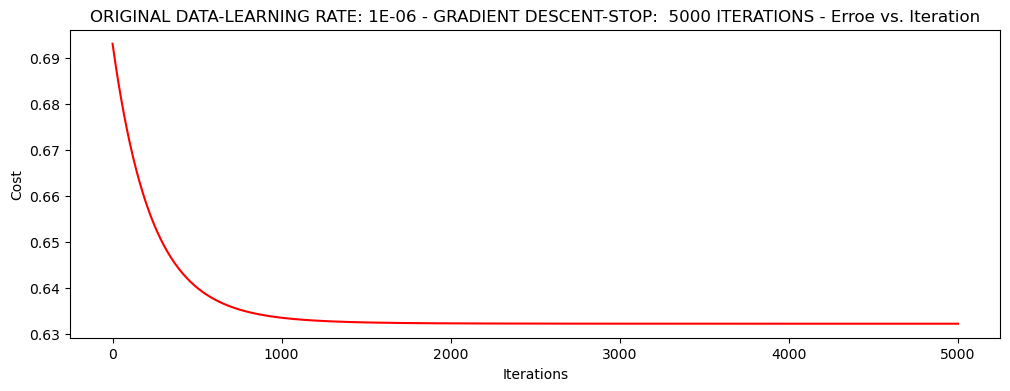

In [30]:
#选择的梯度下降方法是基于所有样本的 所以n=100
n=100
runExpe(orig_data, theta, n, stop_iter, thresh=5000, alpha=0.000001) # 迭代5000次

***Original data-learning rate: 1e-05 - Gradient descent-Stop:  5000 iterations
Theta: [[0.00515997 0.00515997 0.00515997]] - Iter: <built-in function iter> - Last cost: 0.63 - Duration: 0.35s


array([[0.00515997, 0.00515997, 0.00515997]])

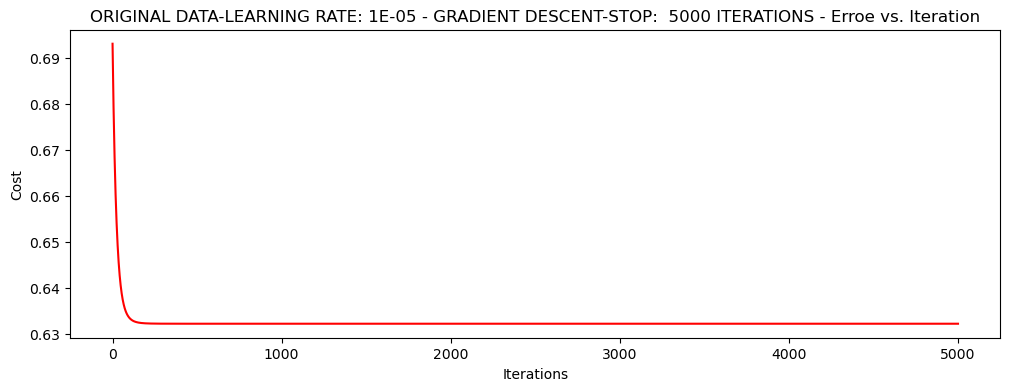

In [31]:
 #选择的梯度下降方法是基于所有样本的 （但是稍微增大学习率）
n=100
runExpe(orig_data, theta, n, stop_iter, thresh=5000, alpha=0.00001)

/var/folders/rw/35ctk7p53dq0j0d29bgbbb0h0000gn/T/ipykernel_9148/1526963040.py:3: RuntimeWarning: divide by zero encountered in log
  right=np.multiply(1 - y,  np.log(1-modle(X,theta)))
/var/folders/rw/35ctk7p53dq0j0d29bgbbb0h0000gn/T/ipykernel_9148/1526963040.py:3: RuntimeWarning: invalid value encountered in multiply
  right=np.multiply(1 - y,  np.log(1-modle(X,theta)))


***Original data-learning rate: 0.01 - Gradient descent-Stop:  5000 iterations
Theta: [[0.40060268 0.40060268 0.40060268]] - Iter: <built-in function iter> - Last cost: nan - Duration: 0.35s


array([[0.40060268, 0.40060268, 0.40060268]])

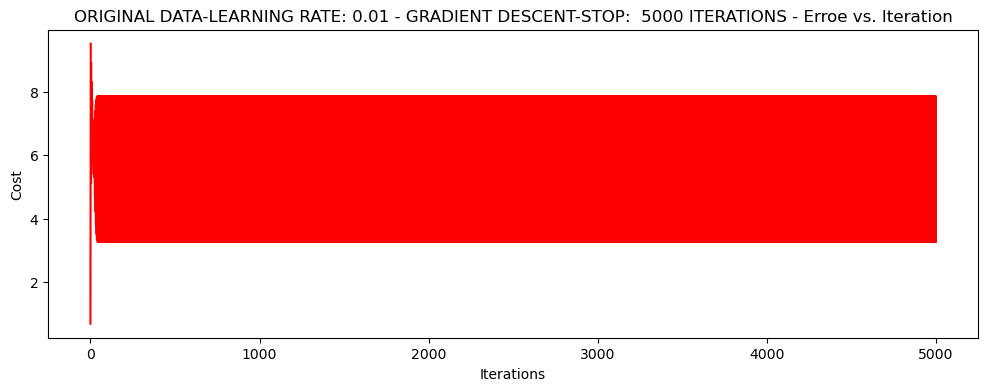

In [32]:
 #选择的梯度下降方法是基于所有样本的 （过大的学习率会导致错误）
n=100
runExpe(orig_data, theta, n, stop_iter, thresh=5000, alpha=0.01)

***Original data-learning rate: 1e-07 - Gradient descent-Stop:  costs change < 1e-11
Theta: [[0.0051599 0.0051599 0.0051599]] - Iter: <built-in function iter> - Last cost: 0.63 - Duration: 3.72s


array([[0.0051599, 0.0051599, 0.0051599]])

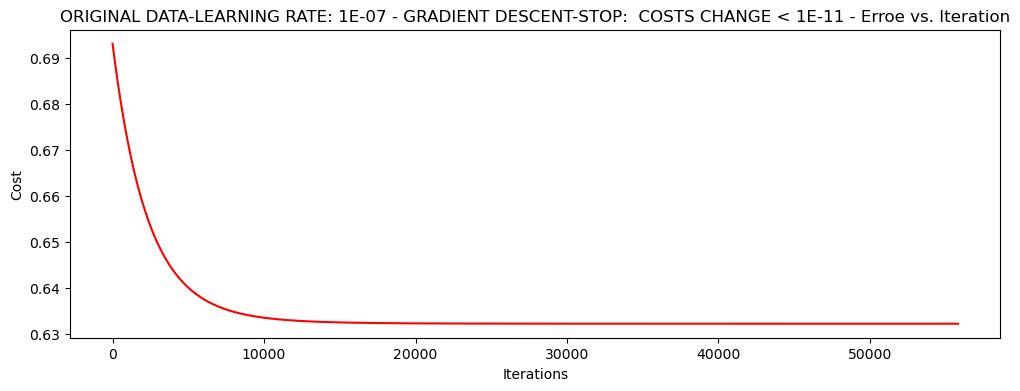

In [33]:
## 根据损失值停止跌打
runExpe(orig_data, theta, n, stop_cost, thresh=0.00000000001, alpha=0.0000001)

In [36]:
## 评估最后的预测结果

#设定阈值
def predict(X, theta):
    return [1 if x >= 0.5 else 0 for x in modle(X, theta)]

In [37]:
scaled_X = orig_data[:, :3]
y = orig_data[:, 3]
predictions = predict(scaled_X, theta)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))

accuracy = 60%
